In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/it-ces/PUBLIC-AI/refs/heads/main/REGRESION/cobb-douglas-firm.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,Unnamed: 0,K,L,y
0,0,10.448902,3.980349,8.498402
1,1,10.802293,2.125921,8.317644
2,2,10.630025,0.852183,6.175296
3,3,11.280932,4.112527,12.158838
4,4,10.376671,3.070118,8.945734
...,...,...,...,...
95,95,9.610686,5.571744,9.592110
96,96,10.707748,3.752217,8.846282
97,97,9.022959,1.920561,7.061450
98,98,10.476081,3.007337,10.188356



1.   Y = CANTIDAD DE LECHE
2.   K = VACAS
3.   L = COWBOYS


In [ ]:
df.describe()

,Unnamed: 0,K,L,y
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,10.135223,3.867814,8.995194
std,29.011492,0.996019,2.498218,1.983456
min,0.000000,8.005316,0.117462,5.071651
25%,24.750000,9.466133,1.865317,7.577015
50%,49.500000,10.268679,3.552560,8.935583
75%,74.250000,10.694634,5.576815,10.220261
max,99.000000,12.274005,12.591583,13.794060


In [ ]:
df['ratio']= df['K']/df['L'] # Cantidad de vacas por trabajador "Independiente"
df['yratio'] = df['y']/df['L'] # Cantidad de leche por trabajador "Dependiente"

In [ ]:
df

,Unnamed: 0,K,L,y,ratio,yratio
0,0,10.448902,3.980349,8.498402,2.625122,2.135090
1,1,10.802293,2.125921,8.317644,5.081229,3.912489
2,2,10.630025,0.852183,6.175296,12.473871,7.246440
3,3,11.280932,4.112527,12.158838,2.743066,2.956537
4,4,10.376671,3.070118,8.945734,3.379894,2.913808
...,...,...,...,...,...,...
95,95,9.610686,5.571744,9.592110,1.724897,1.721563
96,96,10.707748,3.752217,8.846282,2.853712,2.357615
97,97,9.022959,1.920561,7.061450,4.698084,3.676763
98,98,10.476081,3.007337,10.188356,3.483508,3.387833


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

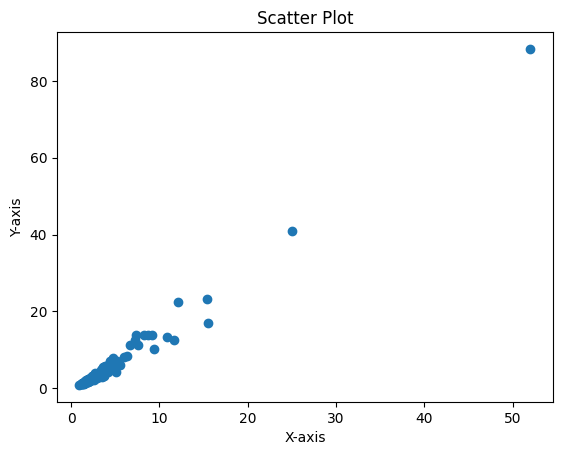

In [ ]:
plt.scatter(df['yratio'], df['ratio'])

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

In [ ]:
df.corr()

,Unnamed: 0,K,L,y,ratio,yratio
Unnamed: 0,1.000000,-0.096244,0.082739,0.021085,-0.039357,-0.028729
K,-0.096244,1.000000,0.130581,0.454278,-0.079174,-0.086750
L,0.082739,0.130581,1.000000,0.674986,-0.489994,-0.517727
y,0.021085,0.454278,0.674986,1.000000,-0.444767,-0.404144
ratio,-0.039357,-0.079174,-0.489994,-0.444767,1.000000,0.990370
yratio,-0.028729,-0.086750,-0.517727,-0.404144,0.990370,1.000000


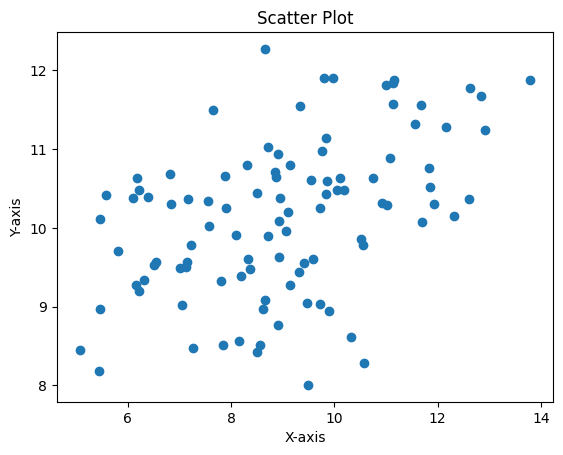

In [ ]:
plt.scatter(df['y'], df['K'])

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

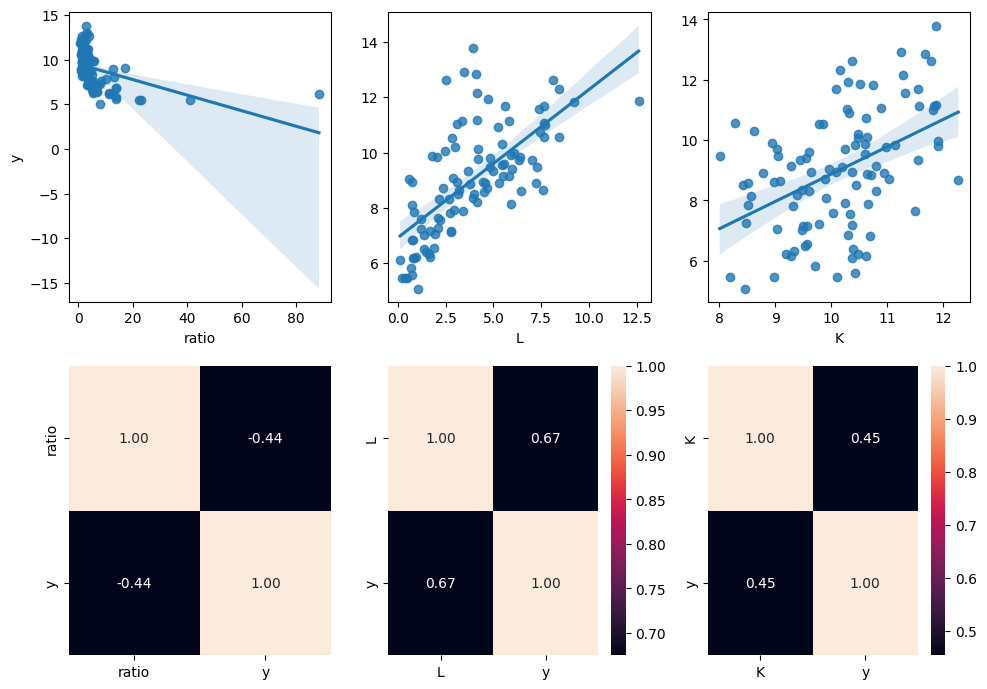

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "ratio", y = "y")
sns.heatmap(df[["ratio", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "L", y = "y").set(ylabel=None)
sns.heatmap(df[["L", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = df, x = "K", y = "y").set(ylabel=None)
sns.heatmap(df[["K", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [ ]:
import statsmodels.api as sm
model = sm.OLS(df['yratio'],df['ratio'] ).fit()
print (model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 yratio   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              4035.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):                    4.78e-82
Time:                        01:10:01   Log-Likelihood:                         -155.22
No. Observations:                 100   AIC:                                      312.4
Df Residuals:                      99   BIC:                                      315.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
df

,Unnamed: 0,K,L,y,ratio,yratio
0,0,10.448902,3.980349,8.498402,2.625122,2.135090
1,1,10.802293,2.125921,8.317644,5.081229,3.912489
2,2,10.630025,0.852183,6.175296,12.473871,7.246440
3,3,11.280932,4.112527,12.158838,2.743066,2.956537
4,4,10.376671,3.070118,8.945734,3.379894,2.913808
...,...,...,...,...,...,...
95,95,9.610686,5.571744,9.592110,1.724897,1.721563
96,96,10.707748,3.752217,8.846282,2.853712,2.357615
97,97,9.022959,1.920561,7.061450,4.698084,3.676763
98,98,10.476081,3.007337,10.188356,3.483508,3.387833


In [ ]:
import numpy as np


In [ ]:
df['log_kp'] = np.log(df['ratio'])
df['log_yp'] = np.log(df['yratio'])
df

,Unnamed: 0,K,L,y,ratio,yratio,log_kp,log_yp
0,0,10.448902,3.980349,8.498402,2.625122,2.135090,0.965127,0.758509
1,1,10.802293,2.125921,8.317644,5.081229,3.912489,1.625553,1.364174
2,2,10.630025,0.852183,6.175296,12.473871,7.246440,2.523636,1.980510
3,3,11.280932,4.112527,12.158838,2.743066,2.956537,1.009076,1.084019
4,4,10.376671,3.070118,8.945734,3.379894,2.913808,1.217844,1.069461
...,...,...,...,...,...,...,...,...
95,95,9.610686,5.571744,9.592110,1.724897,1.721563,0.545168,0.543233
96,96,10.707748,3.752217,8.846282,2.853712,2.357615,1.048621,0.857650
97,97,9.022959,1.920561,7.061450,4.698084,3.676763,1.547155,1.302033
98,98,10.476081,3.007337,10.188356,3.483508,3.387833,1.248040,1.220191


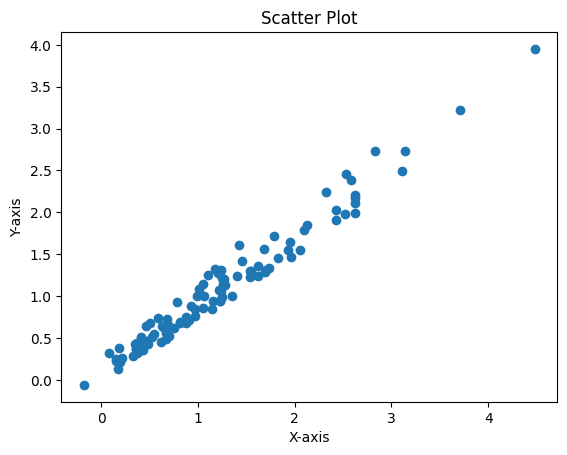

In [ ]:
plt.scatter(df['log_kp'], df['log_yp'])

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df['log_kp'], prepend=False)
model = sm.OLS(df['log_yp'],X ).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_yp   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2746.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.73e-73
Time:                        01:23:54   Log-Likelihood:                 58.853
No. Observations:                 100   AIC:                            -113.7
Df Residuals:                      98   BIC:                            -108.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_kp         0.8202      0.016     52.406      0.0

**El incremento del 1% de Vacas por trabajador incrementa la produccion en 0.86%**

In [ ]:
X

,log_kp,const
0,0.965127,1.0
1,1.625553,1.0
2,2.523636,1.0
3,1.009076,1.0
4,1.217844,1.0
...,...,...
95,0.545168,1.0
96,1.048621,1.0
97,1.547155,1.0
98,1.248040,1.0
